In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#input CSV data
#modify to use relative paths in future
db_path = 'C:\\Users\\rzeml\\intoxicate\\INTOXICATE\\data\\snapshot.05062024.xlsx'

#get names of columns from XLSX file
df_temp = pd.read_excel(db_path, nrows=0,engine='openpyxl', sheet_name='INTOXICATE')
columns = df_temp.columns.tolist()

# Read the XLSX file into a DataFrame
df = pd.read_excel(db_path, engine='openpyxl', sheet_name='INTOXICATE', usecols=columns[2:15])

In [142]:
unique_score = df['INTOXICATE SCORE'].unique()
print(unique_score)

[11. 17.  3.  0.  1.  4. 16. 35. nan 14.  9. 29. -5. 13. 10. 12. 19.  8.
  2. 15.  5. 18.  6. 20.  7. 26. 24. 22.]


In [143]:
#Get a sense of the the frequency for each INTOXICATE SCORE
intoxicate_counts = df['INTOXICATE SCORE'].value_counts()

#>=7 --> ICU

# Display the result
print("\nFrequency of unique values in 'City' column:")
print(intoxicate_counts)


Frequency of unique values in 'City' column:
INTOXICATE SCORE
 5.0     14
 9.0      9
 13.0     9
 3.0      8
 4.0      8
 12.0     8
 6.0      6
 14.0     6
 11.0     5
 10.0     5
 15.0     4
 17.0     3
 16.0     3
 2.0      3
 7.0      3
 8.0      2
 1.0      2
 18.0     2
 0.0      2
 20.0     1
 24.0     1
 26.0     1
 29.0     1
-5.0      1
 19.0     1
 35.0     1
 22.0     1
Name: count, dtype: int64


In [144]:
#Function to convert continuous data to numeric scores

def df_score_conv(df_input, col_str, score_range, score_val):
#lower bound
    df_input.loc[df_input[col_str] < score_range[0], col_str] = score_val[0]
#upper board
    df_input.loc[df_input[col_str] >= score_range[-1], col_str] = score_val[-1]

    for idx,val in enumerate(score_range):
    #middle range
        if (idx != 0) & (idx != len(score_range)):
            df_input.loc[(df_input[col_str] >= score_range[idx-1]) & (df_input[col_str] < score_range[idx]), col_str] =score_val[idx]
    return df_input



In [145]:
#Function to convert binary data into scores
def df_bin_conv(df_input, col_str,bin_val):
    #if yes
    df_input.loc[df_input[col_str] == 'Yes', col_str] = bin_val[0]
    #else
    df_input.loc[df_input[col_str] == 'No', col_str] = bin_val[1]
    #cast as integer type (from string)
    df_input[col_str] = df_input[col_str].astype(int)
    return df_input

In [146]:
#Function to convert intoxicants to numeric score
def df_substance_conv(df_input,col_str):
    df_input.loc[df_input[col_str] == 'Alcohol', col_str] = -5
    df_input.loc[df_input[col_str] == 'Analgesic', col_str] = 1
    df_input.loc[df_input[col_str] == 'Antidepressants', col_str] = 0
    df_input.loc[df_input[col_str] == 'Street Drugs', col_str] = 1
    df_input.loc[df_input[col_str] == 'Sedatives', col_str] = -1
    df_input.loc[df_input[col_str] == 'CO, As, CN', col_str] = -6
    df_input.loc[df_input[col_str] == 'Toxins NOS', col_str] = 2
    df_input.loc[df_input[col_str] == 'Combination', col_str] = 0
    df_input.loc[df_input[col_str] == 'Unknown ', col_str] = 0
    #cast as integer type (from string)
    df_input[col_str] = df_input[col_str].astype(int)
    return df_input

In [147]:
#Variable inputs for each numerical continuous data to score
#make copy of dataframe
df_numeric = df.copy()

#find and remove null samples with null rows
df_numeric = df_numeric.dropna()


In [148]:

#Age
var_range = [25,35,45,55,65]
var_score = [0,2,4,6,8,10]
col_name = 'Age'
df_numeric = df_score_conv(df_numeric,col_name,var_range,var_score)

#HR
var_range = [75,85,95,105]
var_score = [0,1,2,3,4]
col_name = 'Pulse'
df_numeric = df_score_conv(df_numeric,col_name,var_range,var_score)

#SBP
var_range = [100,110,120,130,140]
var_score = [4,2,1,0,-1,-3]
col_name = 'SBP'
df_numeric = df_score_conv(df_numeric,col_name,var_range,var_score)

#GCS
var_range = [6,9,14]
var_score = [9,6,3,0]
col_name = 'GCS'
df_numeric = df_score_conv(df_numeric,col_name,var_range,var_score)

#Respiratory Insufficiency
df_numeric = df_bin_conv(df_numeric, 'Respiratory Insufficiency', [8,0])
#Cirrhosis
df_numeric = df_bin_conv(df_numeric, 'Cirrhosis', [7,0])
#Dysrhythmia
df_numeric = df_bin_conv(df_numeric, 'Dysrhythmia', [5,0])
#2nary reason for ICU admission
df_numeric = df_bin_conv(df_numeric, 'Secondary Reason for ICU Admission', [7,0])
#Toxin scores
df_numeric = df_substance_conv(df_numeric, 'Exposure Category')


In [165]:
#Remove unncessary columns for plotting purposes
df_plotting = df_numeric.copy()
df_plotting = df_numeric.drop(columns=['Gender', 'Predicted Disposition', 'Actual Disposition'])
#convert to plot-compatible format
df_plotting = df_plotting.reset_index()
cols = ['Age','Pulse','SBP','GCS','Respiratory Insufficiency','Cirrhosis','Dysrhythmia','Secondary Reason for ICU Admission','Exposure Category']
df_plot_melt = df_plotting.melt(id_vars='index',value_vars=cols)

<Axes: title={'center': 'These bars are stacked'}, ylabel='index'>

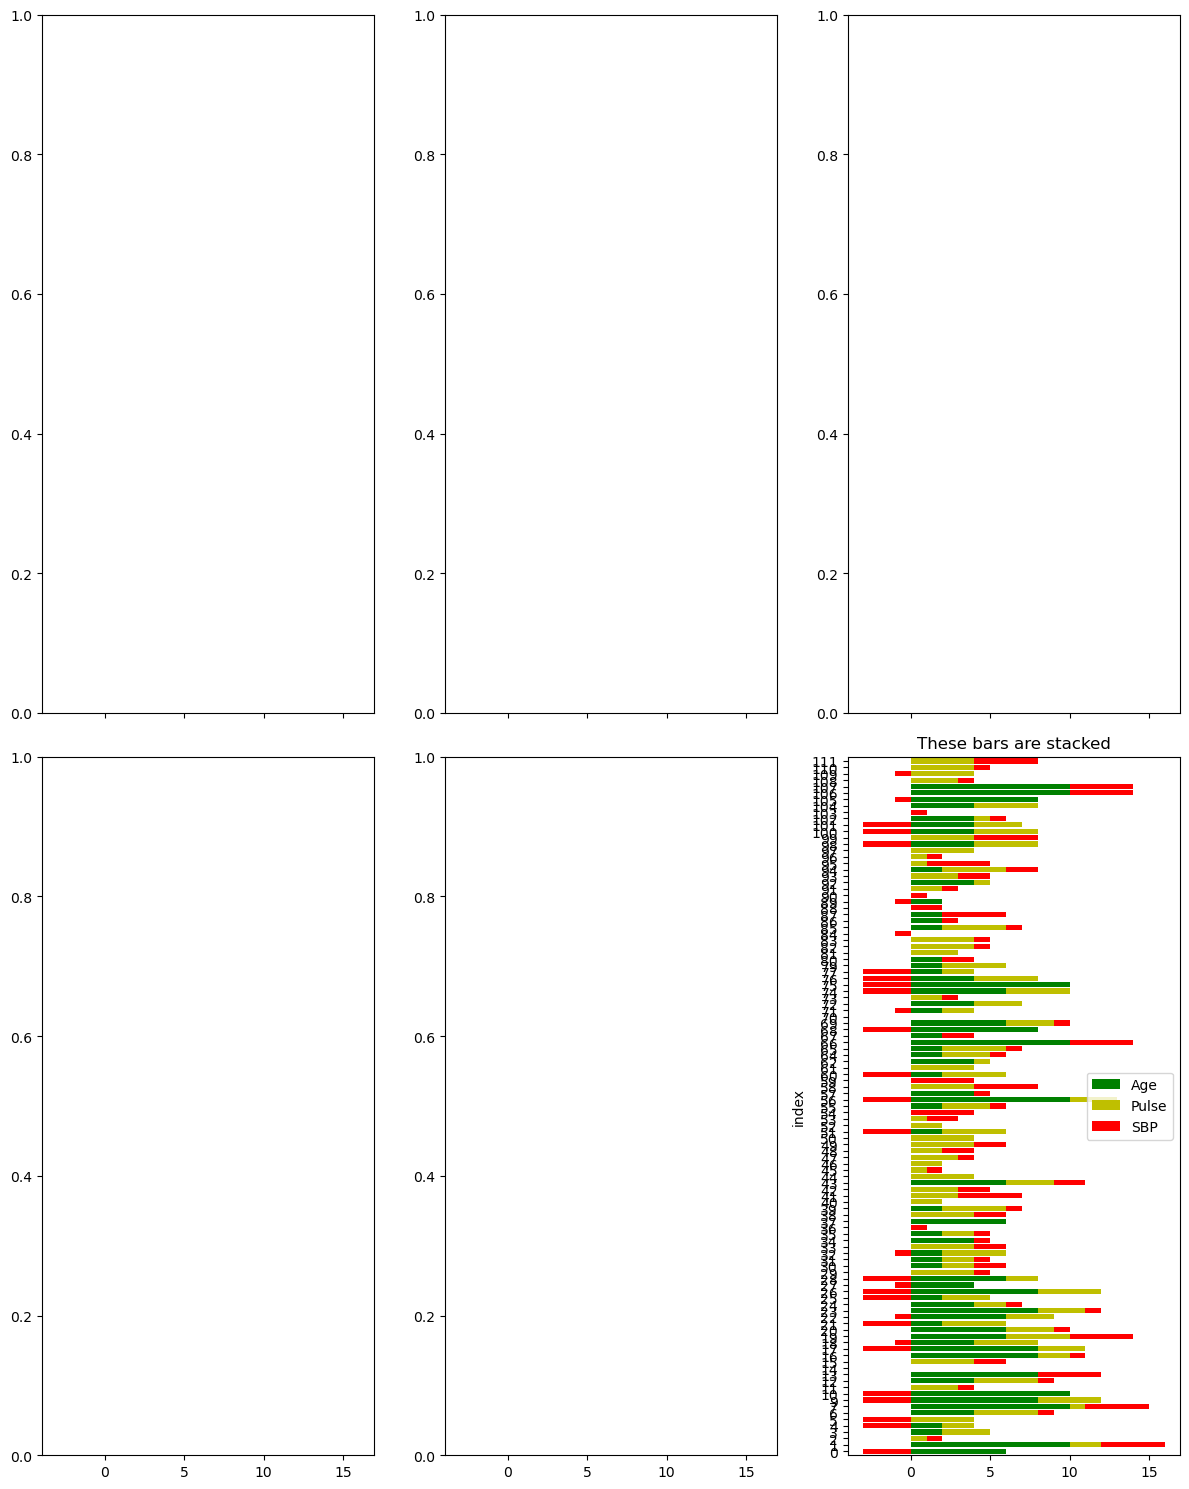

In [170]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(12, 15), sharex=True, tight_layout=True)
#Generate stacked bars
df_plotting.plot(kind='barh', x='index', y=['Age','Pulse','SBP'], stacked=True, width=0.8,color=['g', 'y', 'r'], title='These bars are stacked',ax=ax6)
#ax6.invert_yaxis()

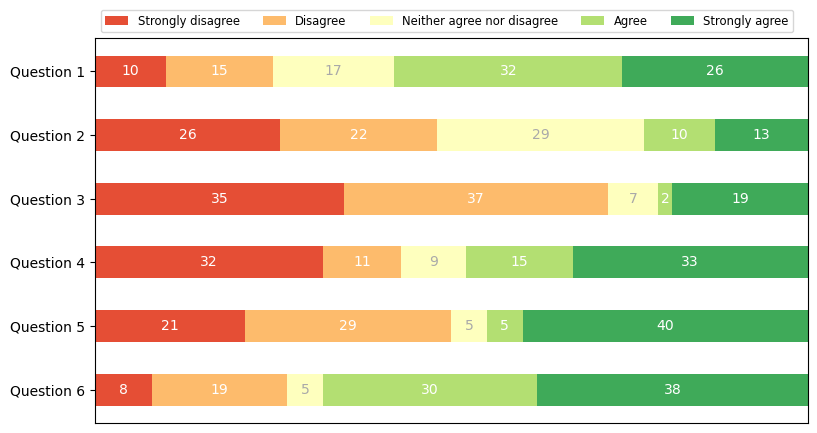

In [150]:


category_names = ['Strongly disagree', 'Disagree',
                  'Neither agree nor disagree', 'Agree', 'Strongly agree']
results = {
    'Question 1': [10, 15, 17, 32, 26],
    'Question 2': [26, 22, 29, 10, 13],
    'Question 3': [35, 37, 7, 2, 19],
    'Question 4': [32, 11, 9, 15, 33],
    'Question 5': [21, 29, 5, 5, 40],
    'Question 6': [8, 19, 5, 30, 38]
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncols=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()

In [151]:
pwd

'c:\\Users\\rzeml\\intoxicate\\INTOXICATE\\src\\rz_hicss_plots'